In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
tf.random.set_seed(18)

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

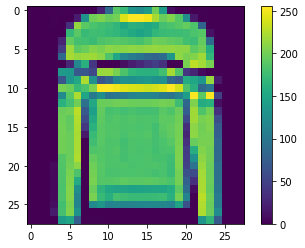

In [4]:
plt.figure()
plt.imshow(X_train[5])
plt.colorbar()
plt.grid(False)
plt.show()

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
X_train = X_train/255
X_test = X_test/255

In [7]:
X_val, X_train = X_train[:5000], X_train[5000:]
y_val, y_train = y_train[:5000], y_train[5000:]

In [8]:
X_val.shape

(5000, 28, 28)

In [9]:
X_train.shape

(55000, 28, 28)

In [10]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [41]:
import pydot

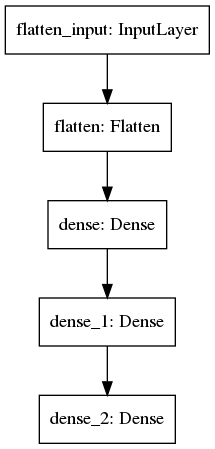

In [42]:
keras.utils.plot_model(model)

In [43]:
weights, bias = model.layers[1].get_weights() 

In [59]:
early_Stoping = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
checkpoint = keras.callbacks.ModelCheckpoint("early_stopping_best_value.h5", save_best_only=True)

In [60]:
print("weights => {}\nbias => {}".format(weights.shape, bias.shape))

weights => (784, 300)
bias => (300,)


In [62]:
model.compile(optimizer='sgd', loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [63]:
mode_history = model.fit(X_train, y_train, epochs=40, validation_data=(X_val, y_val), callbacks=[checkpoint,early_Stoping])

Epoch 1/40
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0878 - accuracy: 0.9665 - val_loss: 0.4269 - val_accuracy: 0.9034
Epoch 2/40
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0752 - accuracy: 0.9712 - val_loss: 0.4292 - val_accuracy: 0.9032
Epoch 3/40
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0712 - accuracy: 0.9730 - val_loss: 0.4299 - val_accuracy: 0.9056
Epoch 4/40
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0690 - accuracy: 0.9740 - val_loss: 0.4373 - val_accuracy: 0.9044
Epoch 5/40
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0672 - accuracy: 0.9746 - val_loss: 0.4407 - val_accuracy: 0.9038
Epoch 6/40
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0661 - accuracy: 0.9748 - val_loss: 0.4425 - val_accuracy: 0.9042
Epoch 7/40
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0648 - accuracy: 0.9750 - val_loss: 0.4470 - val_accuracy:

In [77]:
mode_history.params

{'verbose': 1, 'epochs': 40, 'steps': 1719}

In [78]:
mode_history.history

{'loss': [0.08781369775533676,
  0.07521205395460129,
  0.0712253674864769,
  0.0689508393406868,
  0.06720814108848572,
  0.06612697243690491,
  0.06483469158411026,
  0.06383737176656723,
  0.06292776018381119,
  0.06208931654691696,
  0.06141982972621918],
 'accuracy': [0.9665454626083374,
  0.9711999893188477,
  0.9729999899864197,
  0.9740363359451294,
  0.9745636582374573,
  0.9747999906539917,
  0.9750363826751709,
  0.975745439529419,
  0.9763091206550598,
  0.9765090942382812,
  0.9768000245094299],
 'val_loss': [0.426908016204834,
  0.42916953563690186,
  0.4298897385597229,
  0.43730151653289795,
  0.4407292902469635,
  0.44252628087997437,
  0.44696322083473206,
  0.4480048716068268,
  0.45563074946403503,
  0.45973071455955505,
  0.46025562286376953],
 'val_accuracy': [0.9034000039100647,
  0.9031999707221985,
  0.9056000113487244,
  0.9043999910354614,
  0.9038000106811523,
  0.90420001745224,
  0.9039999842643738,
  0.90420001745224,
  0.9046000242233276,
  0.90259999036

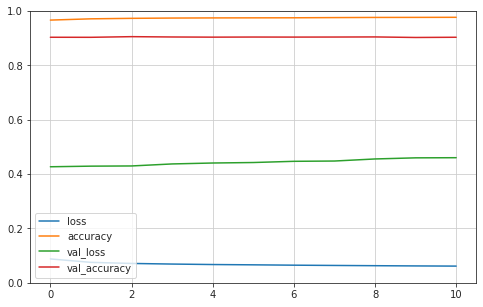

In [79]:
import pandas as pd
import seaborn as sns
sns.set_style('ticks')
pd.DataFrame(mode_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [80]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.4642 - accuracy: 0.8969


[0.46424058079719543, 0.8968999981880188]

In [81]:
X_new = X_test[:5]

In [82]:
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1, 1, 0])

In [70]:
y_test[:5]

array([9, 2, 1, 1, 6], dtype=uint8)

In [71]:
import numpy as np
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'T-shirt/top'],
      dtype='<U11')

In [72]:
model.save("fashion_mnist_1.h5")

In [73]:
# del model

In [74]:
# keras.backend.clear_session()

In [75]:
# model = keras.models.load_model('fashion_mnist_1.h5')

In [76]:
# model.predict_classes(X_new)

<h4>You can also use call backs to save the model after each epoch and use save_best_only to save the best model of all epochs </h4>

<h4>This can save time and we dont need to re-train and run our model again to use the model in future</h4>